# Softmax task

### Import packages

In [1]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Images example from training set

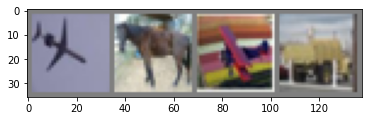

plane horse plane truck


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
images[0]

tensor([[[0.0667, 0.0824, 0.0980,  ..., 0.1686, 0.1765, 0.1843],
         [0.0824, 0.0980, 0.1137,  ..., 0.1922, 0.2000, 0.2078],
         [0.0902, 0.0902, 0.0745,  ..., 0.1843, 0.1843, 0.1922],
         ...,
         [0.0588, 0.0902, 0.1059,  ..., 0.1765, 0.1765, 0.1686],
         [0.0431, 0.0745, 0.0980,  ..., 0.1765, 0.1765, 0.1608],
         [0.0196, 0.0510, 0.0902,  ..., 0.1765, 0.1765, 0.1529]],

        [[0.0667, 0.0824, 0.0980,  ..., 0.1686, 0.1765, 0.1843],
         [0.0824, 0.0980, 0.1137,  ..., 0.1922, 0.2000, 0.2078],
         [0.0902, 0.0902, 0.0745,  ..., 0.1843, 0.1843, 0.1922],
         ...,
         [0.0588, 0.0902, 0.1059,  ..., 0.1765, 0.1765, 0.1686],
         [0.0431, 0.0745, 0.0980,  ..., 0.1765, 0.1765, 0.1608],
         [0.0196, 0.0510, 0.0902,  ..., 0.1765, 0.1765, 0.1529]],

        [[0.2784, 0.3020, 0.3098,  ..., 0.3725, 0.3804, 0.3882],
         [0.3098, 0.3176, 0.3333,  ..., 0.3961, 0.4039, 0.4118],
         [0.3098, 0.3098, 0.2941,  ..., 0.3882, 0.3882, 0.

## Defining a Convolutional Neural Network

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

/mnt/data/klaszewski/miniconda3/envs/nn_proj/lib/python3.9/site-packages/torch/autograd/__init__.py:154: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 101: invalid device ordinal (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/c10/cuda/CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(


[1,  2000] loss: 2.193
[1,  4000] loss: 1.864
[1,  6000] loss: 1.684
[1,  8000] loss: 1.575
[1, 10000] loss: 1.526
[1, 12000] loss: 1.467
[2,  2000] loss: 1.388
[2,  4000] loss: 1.388
[2,  6000] loss: 1.359
[2,  8000] loss: 1.309
[2, 10000] loss: 1.325
[2, 12000] loss: 1.295
Finished Training


In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


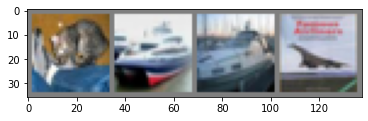

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# NEURAL NETWORK WITH SOFTMAX FUNCTION

In [10]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [11]:
X = torch.tensor([[4.8, 1.21, 2.385],
                [2.5, 2.1, 3.5]])

In [12]:
softmax(X)

tensor([[0.8953, 0.0247, 0.0800],
        [0.2279, 0.1527, 0.6194]])

In [13]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x


net = Net()

In [14]:
def my_loss(output, target):
    loss = torch.mean((output - target)**2)
    return lose

In [15]:
def my_cross_entropy(x,y):
    log_prob = -1.0 * F.log_softmax(x, 1)
    loss = log_prob.gather(1, y.unsqueeze(1))
    loss = loss.mean()
    return loss

In [16]:
import torch.optim as optim

# model = nn.Sequential(nn.Conv2d(3, 6, 5),
                      
#                       nn.MaxPool2d(2, 2),
#                       nn.Linear(16 * 5 * 5, 120),
#                       nn.Linear(120, 84),
#                       nn.Linear(84, 10))
# Define the loss
criterion = nn.NLLLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(net.parameters(), lr=0.001)
epochs = 2
for e in range(epochs):
  running_loss = 0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = my_cross_entropy(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print(f'[{e + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.297
[1,  8000] loss: 2.290
[1, 10000] loss: 2.263
[1, 12000] loss: 2.177
[2,  2000] loss: 2.068
[2,  4000] loss: 2.001
[2,  6000] loss: 1.964
[2,  8000] loss: 1.924
[2, 10000] loss: 1.885
[2, 12000] loss: 1.825
Finished Training


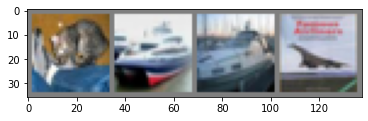

GroundTruth:  cat   ship  ship  plane


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 34 %


# A-Softmax

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import Parameter
from torchvision import datasets, transforms

In [22]:
class AngleLinear(nn.Module):
    def __init__(self, in_features, out_features, m = 4):
        super(AngleLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.Tensor(in_features,out_features))
        self.weight.data.uniform_(-1, 1).renorm_(2,1,1e-5).mul_(1e5)
        self.m = m
        self.mlambda = [
            lambda x: x**0,
            lambda x: x**1,
            lambda x: 2*x**2-1,
            lambda x: 4*x**3-3*x,
            lambda x: 8*x**4-8*x**2+1,
            lambda x: 16*x**5-20*x**3+5*x
        ]

    def forward(self, input):
        x = input   # size=(B,F)    F is feature len
        w = self.weight # size=(F,Classnum) F=in_features Classnum=out_features

        ww = w.renorm(2,1,1e-5).mul(1e5)
        xlen = x.pow(2).sum(1).pow(0.5) # size=B

        cos_theta = x.mm(ww) # size=(B,Classnum)
        cos_theta = cos_theta / xlen.view(-1,1)
        cos_theta = cos_theta.clamp(-1,1)

        cos_m_theta = self.mlambda[self.m](cos_theta)
        theta = Variable(cos_theta.data.acos())
        k = (self.m*theta/np.pi).floor()
        n_one = k*0.0 - 1
        phi_theta = (n_one**k) * cos_m_theta - 2*k

        cos_theta = cos_theta * xlen.view(-1,1)
        phi_theta = phi_theta * xlen.view(-1,1)
        output = (cos_theta,phi_theta)
        return output # size=(B,Classnum,2)

class AngleLoss(nn.Module):
    def __init__(self, test=False, mode='mean'):
        super(AngleLoss, self).__init__()
        self.it = 0
        self.LambdaMin = 0.1
        self.LambdaMax = 1500.0
        self.lamb = 1500.0
        self.test = test
        self.mode = mode

    def forward(self, input, target):
        self.it += 1
        cos_theta,phi_theta = input
        target = target.view(-1,1) #size=(B,1)

        index = cos_theta.data * 0.0 #size=(B,Classnum)
        index.scatter_(1,target.data.view(-1,1),1)
        index = index.byte()
        index = Variable(index)

        output = cos_theta * 1.0 #size=(B,Classnum)
        if self.test:
            output[index] = phi_theta[index]
        else:
            self.lamb = max(self.LambdaMin,self.LambdaMax/(1+0.2*self.it ))
            output[index] -= cos_theta[index]*(1.0+0)/(1+self.lamb)
            output[index] += phi_theta[index]*(1.0+0)/(1+self.lamb)

        logpt = F.log_softmax(output, dim=-1)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1) #.clamp(-2e9, 2e9)

        loss = -logpt
        if self.mode=='mean':
            loss = loss.mean()
        else:
            loss = loss.sum()

        return loss

In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.asoftmax = AngleLinear(10,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.asoftmax(x)
        return x


net = Net()

TEST

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import Parameter
from torchvision import datasets, transforms

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class AngularPenaltySMLoss(nn.Module):

    def __init__(self, in_features, out_features, loss_type='arcface', eps=1e-7, s=None, m=None):
        '''
        Angular Penalty Softmax Loss
        Three 'loss_types' available: ['arcface', 'sphereface', 'cosface']
        These losses are described in the following papers: 
        
        ArcFace: https://arxiv.org/abs/1801.07698
        SphereFace: https://arxiv.org/abs/1704.08063
        CosFace/Ad Margin: https://arxiv.org/abs/1801.05599
        '''
        super(AngularPenaltySMLoss, self).__init__()

        self.s = 2
        self.m = 0.3
   
        self.loss_type = loss_type
        self.in_features = in_features
        self.out_features = out_features
        self.fc = nn.Linear(in_features, out_features, bias=False)
        self.eps = eps

    def forward(self, x, labels):
        '''
        input shape (N, in_features)
        '''
        assert len(x) == len(labels)
        assert torch.min(labels) >= 0
        assert torch.max(labels) < self.out_features
        
        for W in self.fc.parameters():
            W = F.normalize(W, p=2, dim=1)

        x = F.normalize(x, p=2, dim=1)

        wf = self.fc(x)
        numerator = self.s * torch.cos(torch.acos(torch.clamp(torch.diagonal(wf.transpose(0, 1)[labels]), -1.+self.eps, 1-self.eps)) + self.m)
        
        excl = torch.cat([torch.cat((wf[i, :y], wf[i, y+1:])).unsqueeze(0) for i, y in enumerate(labels)], dim=0)
        denominator = torch.exp(numerator) + torch.sum(torch.exp(self.s * excl), dim=1)
        L = numerator - torch.log(denominator)
        return -torch.mean(L)

## Angular Softmax

In [26]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x


net = Net()

In [28]:
import torch.optim as optim
in_features = 10
out_features = 10 # Number of classes
# Define the loss
criterion = AngularPenaltySMLoss(in_features, out_features)
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(net.parameters(), lr=0.1)
epochs = 2
for e in range(epochs):
  running_loss = 0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print(f'[{e + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.842
[1,  4000] loss: 2.785
[1,  6000] loss: 2.731
[1,  8000] loss: 2.689
[1, 10000] loss: 2.656
[1, 12000] loss: 2.637
[2,  2000] loss: 2.615
[2,  4000] loss: 2.609
[2,  6000] loss: 2.604
[2,  8000] loss: 2.594
[2, 10000] loss: 2.595
[2, 12000] loss: 2.586
Finished Training


In [29]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 19 %
